# National School Data Analysis
###### Group B: Steven and Joshua


### Introduction
The level of education has been one of the most essential factor in the development of the country. This report therefore focus on analyzing the state of Indonesian's education system in each region within 5-10 years period and discovering the element for a school to be success. The objective of these findings is going to be valuable for schools and other education department to grow which further turns Indonesia into an advance country.

The dataset used to explore was accessed through the Indonesian ministry of education and culture website, which can be access through the following link:

Dataset1: [https://dapo.dikdasmen.kemdikbud.go.id/sp](https://dapo.dikdasmen.kemdikbud.go.id/sp)

Dataset2: [http://statistik.data.kemdikbud.go.id/](http://statistik.data.kemdikbud.go.id/)


The main questions this paper aims to answer are:
1. What is the state of Indonesian education within the past 5-10 years nationally.

2. How large is the discrepancy/inequality in Indonesian education.

3. What is the parameters that contribute the most to a school success. 

In [119]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

## Question 1: What is the state of Indonesian education whithin the past 5-10 years nationally

### The Number of School progressively

In [141]:
#Reading all the dataset and append it on df array

df = []
for i in range(1,10):
    names = "Desktop/dataset/data_sekolah/df" + str(i) + ".csv"
    df.append(pd.read_csv(names, sep=";", header=[0,1], index_col=0, skiprows=1))
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    df[i-1].columns = pd.MultiIndex.from_arrays(arrays)

In [142]:
#Slice the total number of school from all element of df array
Tot_Sekolah = []
ind = []
tahun = 2015
sem = ["Genap", "Ganjil"]


for i in range(8, -1, -1):
    Tot_Sekolah.append(df[i]["Total"]["Jml"].loc["Total"])
    semester = "Semester " + str(tahun) + "/" + str(tahun+1) + " " + sem[i%2]
    ind.append(semester)
    if sem[i%2] == sem[0]:
        tahun += 1


numSchool = pd.DataFrame(data=Tot_Sekolah, index=ind, columns = ["Jumlah Sekolah"])

In [143]:
#Applying Linear Regression
Y = numSchool.reset_index().iloc[:,1].values.reshape(-1, 1)
X = np.array(list(range(1,len(numSchool)+1))).reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

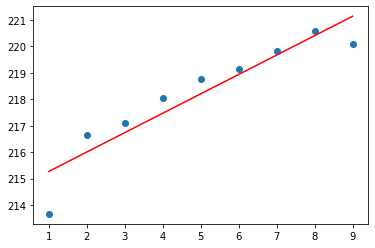

In [144]:
#Plotting Linear Regression
plt.scatter(X,Y)
plt.plot(X, Y_pred, color = 'red')

plt.show()

In [145]:
#Print results
print('coefficient of determination:', linear_regressor.score(X,Y))
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

coefficient of determination: 0.8683782753112147
intercept: [214.53691667]
slope: [[0.73401667]]


Coefficient of determination indicate how well a statistical model fits the data. For this data the R^2 approaching to 1 which mean the data is linear fit and we can use linear regression.

After plotting the linear regression, we achieve a fitted model that can be written as Y = alpha + beta X
where alpha is 214.5 (intercept) and beta is 0.73 (slope)

### The number of Student per Teacher (Jenjang) progressively

In [146]:
#Reading all the dataset (murid & guru) and append it to df array

df_m = []
df_g = []
for i in range(1,10):
    names_m = "Desktop/dataset/data_peserta_didik/df" + str(i) + ".csv"
    df_m.append(pd.read_csv(names_m, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    names_g = "Desktop/dataset/data_guru/df" + str(i) + ".csv"
    df_g.append(pd.read_csv(names_g, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    df_m[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    df_g[i-1].columns = pd.MultiIndex.from_arrays(arrays)

In [147]:
#Slice the total number of student and teacher from all element of df array
Tot_m = []
Tot_g = []
ind = []
tahun = 2015
sem = ["Genap", "Ganjil"]


for i in range(8, -1, -1):
    Tot_m.append(df_m[i]["Total"]["Jml"].loc["Total"])
    Tot_g.append(df_g[i]["Total"]["Jml"].loc["Total"])
    
    semester = "Semester " + str(tahun) + "/" + str(tahun+1) + " " + sem[i%2]
    ind.append(semester)
    if sem[i%2] == sem[0]:
        tahun += 1
        
ratio_mg = {"Jml Murid":Tot_m, "Jml Guru":Tot_g}
ratio_mg = pd.DataFrame(ratio_mg, index=ind) 


#Type conversion from string to int
repl_list = {',':'.', r'\.': '', r' ': ''}
ratio_mg["Jml Murid"].replace(repl_list, regex=True, inplace=True)
ratio_mg["Jml Guru"].replace(repl_list, regex=True, inplace=True)

ratio_mg["Jml Murid"] = ratio_mg["Jml Murid"].astype(int)
ratio_mg["Jml Guru"] = ratio_mg["Jml Guru"].astype(int)
#ratio_mg.dtypes

ratio_mg["Jml Murid per Guru"] = ratio_mg["Jml Murid"]/ratio_mg["Jml Guru"]
ratio_mg

,Jml Murid,Jml Guru,Jml Murid per Guru
Semester 2015/2016 Genap,44631066,2912170,15.325708
Semester 2016/2017 Ganjil,45318320,2946136,15.382291
Semester 2016/2017 Genap,45134357,2933290,15.386940
Semester 2017/2018 Ganjil,45388330,2748473,16.514017
Semester 2017/2018 Genap,45209158,2753425,16.419244
Semester 2018/2019 Ganjil,45037323,2755020,16.347367
Semester 2018/2019 Genap,44831625,2759324,16.247322
Semester 2019/2020 Ganjil,44761040,2732340,16.381944
Semester 2019/2020 Genap,44621547,2720778,16.400290


In [148]:
#Applying Linear Regression
Y = ratio_mg.reset_index().iloc[:,3].values.reshape(-1, 1)
X = np.array(list(range(1,len(ratio_mg)+1))).reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [149]:
min(ratio_mg["Jml Guru"])

2720778

In [150]:
max(ratio_mg["Jml Murid"]) - min(ratio_mg["Jml Murid"])

766783

In [151]:
max(ratio_mg["Jml Guru"]) - min(ratio_mg["Jml Guru"])

225358

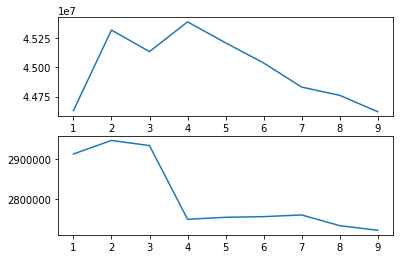

In [152]:
plt.subplot(2,1,1)
plt.plot(range(1,10), ratio_mg["Jml Murid"])
#plt.ylim(44600000, 45900000)
plt.subplot(2,1,2)
plt.plot(range(1,10), ratio_mg["Jml Guru"])
#plt.ylim(2700000,4000000)
plt.show()

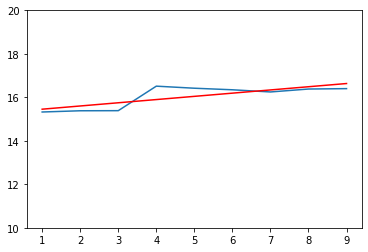

In [153]:
#Plotting Linear Regression
plt.plot(X,Y)
plt.plot(X, Y_pred, color = 'red')
plt.ylim(10,20)
plt.show()

In [154]:
#Print results
print('coefficient of determination:', linear_regressor.score(X,Y))
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

coefficient of determination: 0.6154252328777234
intercept: [15.30739678]
slope: [[0.14752335]]


### Things to add:
1. show the growth of number of school growth per jenjang (mungkin lebih fokus ke jenjang sma)
2. show the growth of number of student/teacher per jenjang
3. show the growth of number of resources: library, classroom, medical rooms, labs. **(MUST ADD!)**
4. show the growth competence of the teacher by its degree

## Question 2: How large is the discrepancy/inequality in Indonesian education

### Comparing number of school per province

From the latest data of number of school in Indonesia `(df[0])`, we want to compare the different/discrepancy number of school per province while using its area as a comparison

In [405]:
#Read the luas wilayah data and take the latest year
df_lw = pd.read_csv("Desktop\dataset\data_luas_wilayah\luas_wilayah.csv", sep=";", header=[0,1], index_col=0, skiprows=3)
df_lw = df_lw['2016'].dropna()
repl_list = {',':'.', r'\.': '', r' ': ''}
df_lw["Luas 1"].replace(repl_list, regex=True, inplace=True)
df_lw["Luas 1"] = df_lw["Luas 1"].astype(int)
df_lw["Luas 1"] /= 100

In [406]:
# Make a copy of df[0] and make the index the same as luas wilayah
df_copy = df[0].copy()
df_copy["Wilayah"] = df_copy["Wilayah"]["Wilayah"].map(lambda x: x.lstrip('Prov.').lstrip(' '))
repl_list = {r'\.': '',}
df_copy["Wilayah"] = df_copy["Wilayah"]["Wilayah"].replace(repl_list, regex=True)

df_copy = df_copy.set_index(df_copy["Wilayah"]["Wilayah"])
df_copy = df_copy._drop_axis(["Wilayah"], axis=1, level=1)

# Make adjustment of Indonesian . and ,
df_copy["Total"] *= 1000
df_copy.loc["Kalimantan Utara"] /= 1000

In [407]:
#Combine the num of school data and luas wilayah data
df_lw = pd.concat([df_copy.Total, df_lw], axis=1, join='outer').dropna()
#df_lw.reset_index()
df_lw["Luas per Jml"] = df_lw["Luas 1"] / df_lw["Jml"]

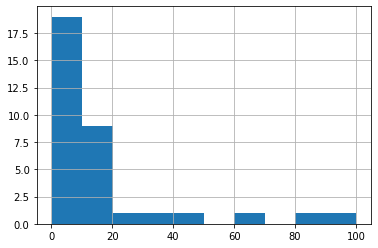

In [408]:
# Plot Histogram
data = df_lw["Luas per Jml"]
w = 10
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)
plt.grid()
plt.show()
#df_lw["Luas per Jml"].hist()       

In [409]:
#Searching for Upper bound Outlier
sorted(df_lw["Luas per Jml"])
q1, q3= np.percentile(df_lw["Luas per Jml"],[25,75])
iqr = q3 - q1
upper_bound = q3 +(1.5 * iqr)

df_lw[df_lw["Luas per Jml"] > upper_bound].sort_values(["Luas per Jml"])

,Jml,N,S,Luas 1,Luas per Jml
Kalimantan Tengah,3868.0,3420.0,448000.0,153564.50,39.701267
Kalimantan Timur,3030.0,2329.0,701000.0,129066.64,42.596251
Papua Barat,1567.0,1010.0,557000.0,99671.63,63.606656
Papua,3687.0,2358.0,1329.0,319036.05,86.529984
Kalimantan Utara,754.0,649.0,105.0,75467.70,100.089788


In [410]:
df_lw.sort_values(["Luas per Jml"]).head()

,Jml,N,S,Luas 1,Luas per Jml
DKI Jakarta,4598.0,1945.0,2653.0,664.01,0.144413
DI Yogyakarta,2748.0,1770.0,978000.0,3133.15,1.140156
Jawa Barat,30120.0,20360.0,9760.0,35377.76,1.174560
Banten,7557.0,4759.0,2798.0,9662.92,1.278671
Jawa Tengah,24925.0,20124.0,4801.0,32800.69,1.315976


The `Luas per Jml` column indicate the average area of a school cover in a province which also means a province with a lower value has a better access to education. From the histogram, most of the province in Indonesia averagely have a school within less than 20 km square. 

The provinces with a better school access are generally located in the west and central part of Java. , the capital of Indonesia, DKI Jakarta has an extremely low value (10 times lower than the runner up) that means there is a school in every 0.1 km square in Jakarta.

However, there are some school with `Luas per Jml` that are significantly higher than the rest. Those school that fall into the upper bound outlier are located in Kalimantan and Papua.

### Comparing the number of student/teacher ratio per province

In [451]:
# Do a slicing on data murid and data guru
df_murid = df_m[0]["Total"].set_index(df_m[0]["Wilayah"]["Wilayah"].map(lambda x: x.lstrip('Prov.').lstrip(' ')))
df_murid.columns = ["Jml Murid", "Murid N", "Murid S"]

df_guru = df_g[0]["Total"].set_index(df_g[0]["Wilayah"]["Wilayah"].map(lambda x: x.lstrip('Prov.').lstrip(' ')))
df_guru.columns = ["Jml Guru", "Guru N", "Guru S"]

,Jml Guru,Guru N,Guru S
Wilayah,,,
Jawa Barat,374.022,145.075,228.947
Jawa Timur,328.64,132.138,196.502
Jawa Tengah,295.208,114.280,180.928
Sumatera Utara,180.963,49.550,131.413
Sulawesi Selatan,116.678,34.210,82.468
Sumatera Selatan,98.605,28.644,69.961
Banten,95.941,35.994,59.947
Lampung,94.59,31.476,63.114
Nusa Tenggara Timur,93.874,36.113,57.761


In [454]:
#Combine both data and do data type conversion
df_mgc = pd.concat([df_murid, df_guru], axis=1, join='outer').dropna()

repl_list = {r'\.': '',}
df_mgc = df_mgc.replace(repl_list, regex=True)
df_mgc["Guru N"] *= 1000
df_mgc = df_mgc.astype(int)

df_mgc["Jml Murid"] = df_mgc["Murid N"] + df_mgc["Murid S"]
df_mgc["Jml Guru"] = df_mgc["Guru N"] + df_mgc["Guru S"]

In [486]:
#Create Murid/Guru col
df_mgc["Murid per Guru"] = df_mgc["Jml Murid"] / df_mgc["Jml Guru"]
df_mgc.sort_values("Murid per Guru")

,Jml Murid,Murid N,Murid S,Jml Guru,Guru N,Guru S,Murid per Guru
Luar Negeri,19936,10151,9785,373462,373000,462,0.053382
Sulawesi Tengah,304681,28644,276037,42820,14227,28593,7.115390
Sumatera Barat,576340,54894,521446,77453,17548,59905,7.441158
Riau,696359,67045,629314,84732,22785,61947,8.218371
Kalimantan Timur,385507,37422,348085,43231,15155,28076,8.917374
Aceh,865952,449094,416858,85375,20593,64782,10.142922
Kepulauan Bangka Belitung,155466,141904,13562,15318,5332,9986,10.149236
Kalimantan Tengah,481758,249446,232312,39316,13425,25891,12.253485
Nusa Tenggara Barat,853345,446972,406373,68439,28843,39596,12.468695
Maluku,398990,207353,191637,31368,8999,22369,12.719651


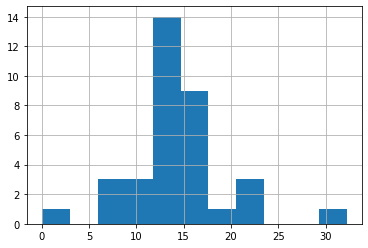

In [475]:
# Plot Histogram
data = df_mgc["Murid per Guru"].drop("Total")
w = 3
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)
plt.grid()
plt.show()

In [485]:
df_mgc.loc["Total"]["Murid per Guru"]

16.40028954953326

Result:
- The average ratio of student every one teacher is 16.4
- Aside from the *luar negeri*, Sulawesi Tengah, Sumatera Barat, Riau, and one of the province that has the less number of school per km squares, Kalimantan Timur, has the most percentage of teacher compare to student.
- While Papua and Sulawesi Tenggara has a high value of `Murid per Guru`, the province with more school such as Jawa Tengah, DKI Jakarta, Banten, Jawa Barat also has a large number of student compare to the teacher

### Comparing the number of facilities per province

### Comparing Nilai UN per province (?)

### Comparing the Akreditasi Sekolah per province

In [17]:
df = pd.read_csv("Desktop/dataset/data_akreditasi/Data-Status-Akreditasi-Satuan-Pendidikan-2018.csv")

In [18]:
df.kecamatan.value_counts().count()

44

In [19]:
df.head()

,npsn,nama_sekolah,akreditasi,alamat,kelurahan,kecamatan
0,69949362,BKB PAUD AL GHIFARI,C,Jl. Seha No. 37,Grogol Selatan,Kebayoran Lama
1,69822374,BKB PAUD AL-KARIMIYAH,Tidak Terakreditasi,Jl. Gg masjid Muyasarin,Cipulir,Kebayoran Lama
2,69889468,BKB PAUD AMEROH,Tidak Terakreditasi,Jl. Pondok Pinang 2 No. 33,Pondok Pinang,Kebayoran Lama
3,69831203,BKB PAUD ANANDA,Tidak Terakreditasi,Jl. Kemandoran 8A,Grogol Utara,Kebayoran Lama
4,NaN,BKB PAUD ANGGREK,Tidak Terakreditasi,Jl. Jatayu,Kebayoran Lama Utara,Kebayoran Lama


In [20]:
df.akreditasi.value_counts()

A                      3581
B                      1808
Tidak Terakreditasi    1375
C                       144
Name: akreditasi, dtype: int64

# Testing Beautiful Soup

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [38]:
url = "https://bansm.kemdikbud.go.id/akreditasi"
html = urlopen(url)

In [39]:
html.read()

b'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n    <title>.:--BANSM--:.</title>\r\n    <meta name="description" content="BANSM">\r\n    <meta name="author" content="Kementrian Sosial">\r\n\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">\r\n\r\n    <link rel="shortcut icon" href="https://bansm.kemdikbud.go.id/assets/images/logo-sm.png" type="image/png">\r\n\r\n    <link href=\'https://fonts.googleapis.com/css?family=Oswald:400,100,300,500,700%7CLato:400,300,700,900&subset=latin,latin-ext\' rel=\'stylesheet\' type=\'text/css\'>\r\n\r\n    <link href="https://bansm.kemdikbud.go.id/assets/dashboard/plugins/bootstrap-sweetalert/sweet-alert.css" rel="stylesheet" type="text/css">\r\n\r\n    <link rel="stylesheet" href="https://bansm.kemdikbud.go.id/assets/assets/css/assets.css">\r\n    \r\n    <script src="https://bansm.kemdikbud.go.id/assets/assets/vpdf/pdfobject.min.js"></script

In [32]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [33]:
title = soup.title
print(title)

<title>.:--BANSM--:.</title>


In [34]:
text = soup.get_text()
print(soup.text)




.:--BANSM--:.

















































Cari













 Beranda
 Organisasi

 Profil 

 Tentang BAN S/M 

Dasar Hukum 
Visi dan Misi 
Tugas dan Fungsi 


 Struktur organisasi 

Keanggotaan, Masa Jabatan, dan Pergantian Anggota BAN-S/M 
Tugas dan Fungsi BAN-S/M 
Hak dan Kewajiban Anggota BAN-S/M 
Persyaratan dan Pembentukan BAN-S/M 
Pemilihan Ketua 
Susunan Organisasi BAN-S/M 
PPK BPP 


 Tata hubungan kerja lembaga akreditasi sekolah 

 Sekretariat 



 Kebijakan

 Mekanisme Akreditasi 

 Pelaksanaan Akreditasi 

 Sistem Pendataan   

 Kode Etik dan Tatatertib 

 Pelaporan dan Rekomendasi 

 Pengumuman, Klarifikasi, dan Pengaduan 

 Panduan Khusus Akreditasi 

 Sosialisasi dan Publikasi 



 Kegiatan

 Pelatihan Untuk Pelatih 

 Pelatihan Asesor 

 Perangkat Akreditasi 

 PMPA 

 Surveilans 



 Data Akreditasi
 Data Asesor
 Artikel
 Unduhan
 Pengumuman
 Kontak





 



Data Akreditasi Sekolah






Temukan Informasi Akreditas Sekolah

Sekolah mana yang in

In [41]:
import bs4
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

my_url = 'https://bansm.kemdikbud.go.id/akreditasi'
uClient = urlopen(my_url)
page_html = uClient.read()
uClient.close()

In [46]:
page_soup = soup(page_html, "html.parser")
page_soup.h1

In [47]:
page_soup.findAll("div", {"class":"col-xs-12 col-md-12"})

[]